<a href="https://colab.research.google.com/github/ShivanshGupta55/Regression_Model/blob/master/Assignment_2_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv('/content/Expander_data.csv')

In [3]:
df.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


In [4]:
df.isnull().sum()

Timestamp                         0
Suction Pressure (psig)           0
Suction Temperature (F)           0
Total Flow (gpm)                  0
Speed (rpm)                       0
By-pass Valve Position (%)        0
Discharge Pressure (psig)         0
Discharge Temperature (F)         0
Run Status                    79230
dtype: int64

In [0]:
df = df.drop(['Run Status'], axis=1)

In [6]:
df.shape

(79230, 8)

In [0]:
df = df.drop(['Timestamp'], axis=1)

In [0]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [9]:
#descriptive statistics summary
train['Discharge Pressure (psig)'].describe()

count    63387.000000
mean       168.107087
std         75.855364
min         69.983885
25%        101.179953
50%        149.849662
75%        215.138206
max        324.411576
Name: Discharge Pressure (psig), dtype: float64

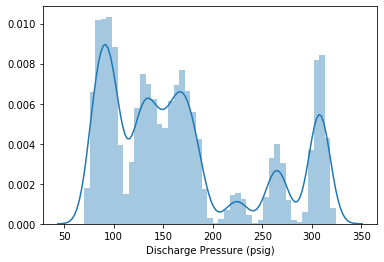

In [10]:
import seaborn as sns
sns.distplot(train['Discharge Pressure (psig)'])


##### Relationship with numerical variables


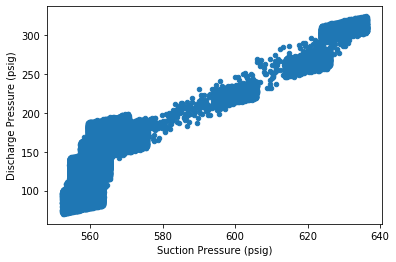

In [11]:
#scatter plot Suction Pressure (psig)/Discharge Pressure (psig)
var = 'Suction Pressure (psig)'
data = pd.concat([train['Discharge Pressure (psig)'], train[var]], axis=1)
data.plot.scatter(x=var, y='Discharge Pressure (psig)')

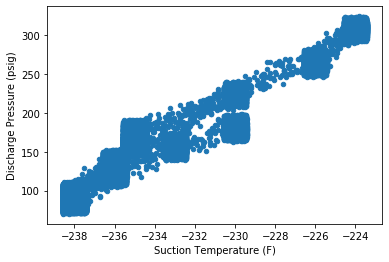

In [12]:
#scatter plot Suction Temperature (F)/Discharge Pressure (psig)
var = 'Suction Temperature (F)'
data = pd.concat([train['Discharge Pressure (psig)'], train[var]], axis=1)
data.plot.scatter(x=var, y='Discharge Pressure (psig)')

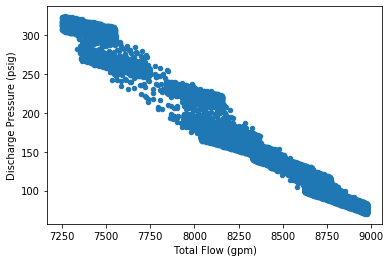

In [13]:
#scatter plot Total Flow (gpm)/Discharge Pressure (psig)
var = 'Total Flow (gpm)'
data = pd.concat([train['Discharge Pressure (psig)'], train[var]], axis=1)
data.plot.scatter(x=var, y='Discharge Pressure (psig)')


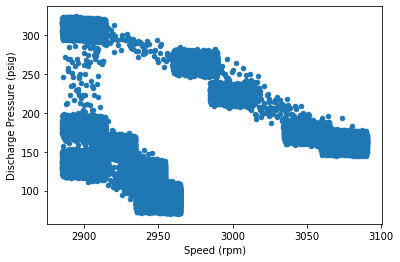

In [14]:
#scatter plot Speed (rpm)/Discharge Pressure (psig)
var = 'Speed (rpm)'
data = pd.concat([train['Discharge Pressure (psig)'], train[var]], axis=1)
data.plot.scatter(x=var, y='Discharge Pressure (psig)')


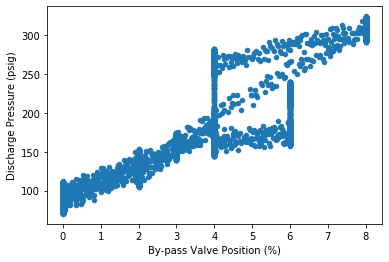

In [15]:
#scatter plot By-pass Valve Position (%)/Discharge Pressure (psig)
var = 'By-pass Valve Position (%)'
data = pd.concat([train['Discharge Pressure (psig)'], train[var]], axis=1)
data.plot.scatter(x=var, y='Discharge Pressure (psig)')

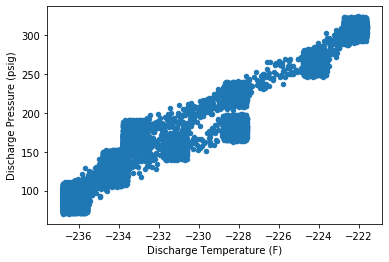

In [16]:
#scatter plot Discharge Temperature (F)/Discharge Pressure (psig)
var = 'Discharge Temperature (F)'
data = pd.concat([train['Discharge Pressure (psig)'], train[var]], axis=1)
data.plot.scatter(x=var, y='Discharge Pressure (psig)')

From above plots we see that discharge pressure depends linearly on Suction pressure, Suction Temperature, total flow and discharge temperature

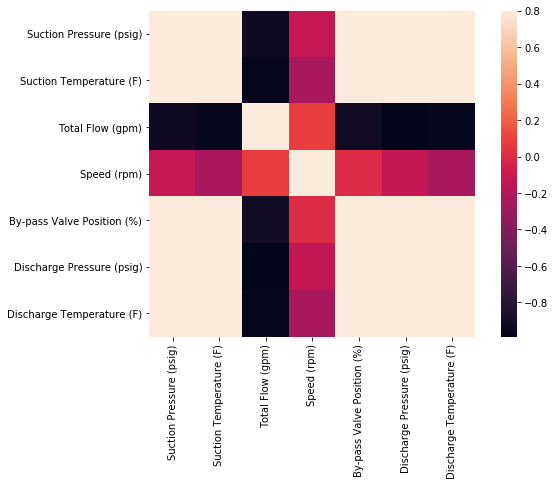

In [17]:
#correlation matrix
import matplotlib.pyplot as plt
corrmat = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corrmat, vmax=.8, square=True);

In [0]:
X_train = np.asanyarray(train[['Suction Pressure (psig)','Suction Temperature (F)','Total Flow (gpm)','Discharge Temperature (F)']])

In [0]:
y_train = np.asanyarray(train['Discharge Pressure (psig)'])

In [0]:
X_test = np.asanyarray(test[['Suction Pressure (psig)','Suction Temperature (F)','Total Flow (gpm)','Discharge Temperature (F)']])
y_test = np.asanyarray(test['Discharge Pressure (psig)'])

In [0]:
# we are going to scale to data

y_train= y_train.reshape(-1,1)
y_test= y_test.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [22]:
X_train

array([[ 0.67696135,  0.72886841, -0.66227977,  0.73322029],
       [ 0.70360014,  0.53004496, -0.34792728,  0.52712994],
       [ 0.69025763,  0.70762346, -0.70866238,  0.70567954],
       ...,
       [-0.65035441,  0.52131041, -0.60754665,  0.51905039],
       [-0.30293066,  0.56843156, -0.23804351,  0.56728873],
       [-0.51501541,  0.60990792, -0.30725693,  0.6126131 ]])

### Creating and Training Model

### Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [24]:
lm.fit(X_train,y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [25]:
print(lm.intercept_)

[6.32532972e-16]


In [26]:
print(lm.coef_)

[[ 0.23666715  0.18136527 -0.59402401  0.00403491]]


In [0]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

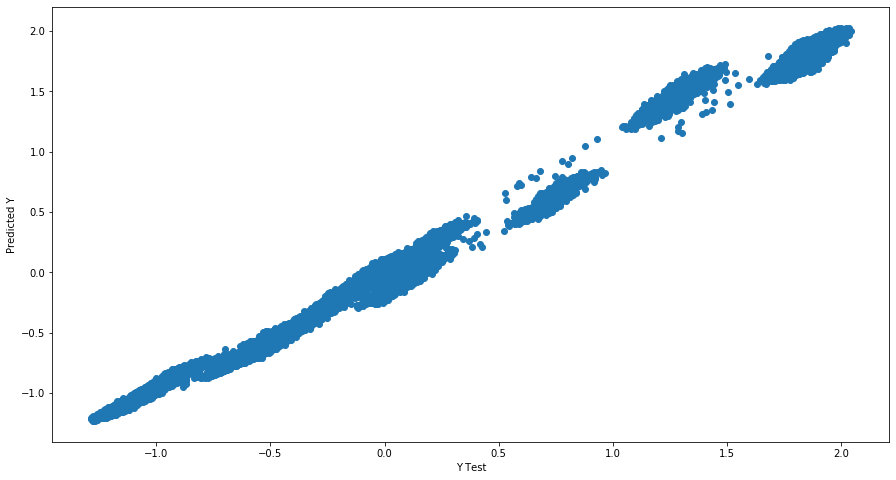

In [28]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [29]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 0.08777750335812928


### Gradient Boosting Regression

In [0]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

In [33]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

RMSE: 0.039996038779232364


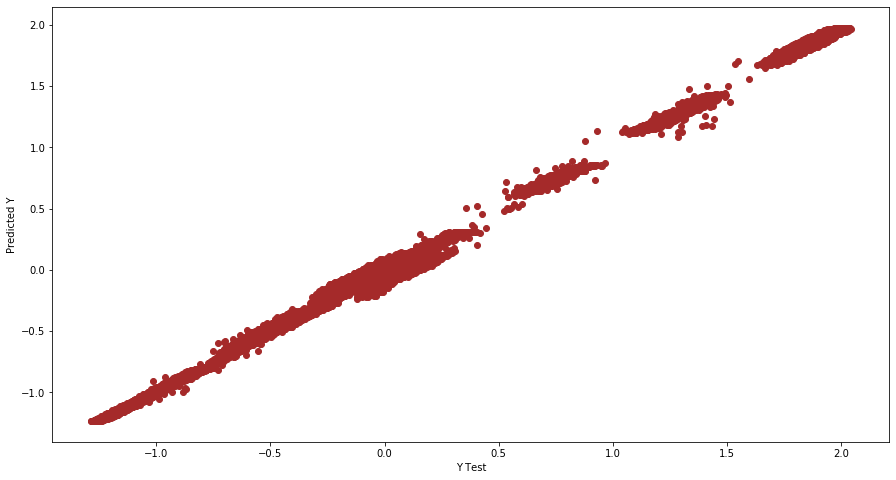

In [34]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### Decision Tree Regression

In [35]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [0]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

RMSE: 0.05358831303666697


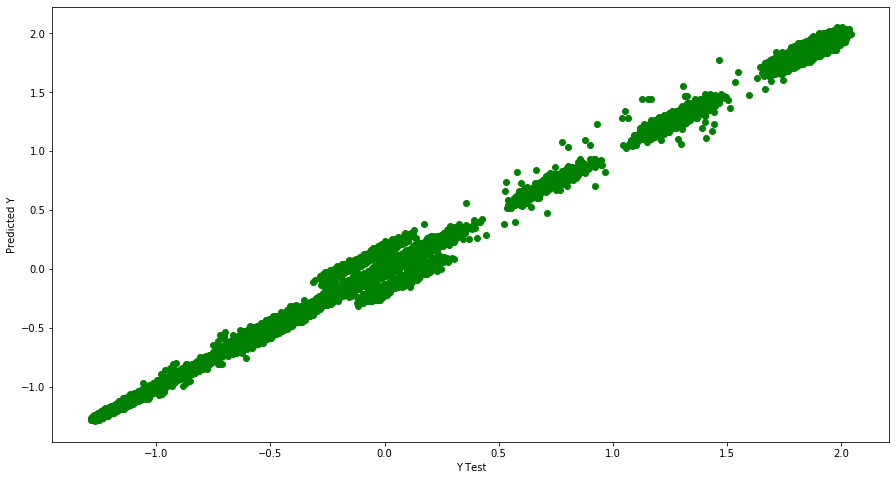

In [37]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### Random Forest Regression

In [38]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 500, random_state = 0)
rfr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [39]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

RMSE: 0.0397173715470261


## Model Comparison

In [0]:
error_rate=np.array([metrics.mean_squared_error(y_test, predictions),metrics.mean_squared_error(y_test, clf_pred),metrics.mean_squared_error(y_test, dtr_pred),metrics.mean_squared_error(y_test, rfr_pred)])

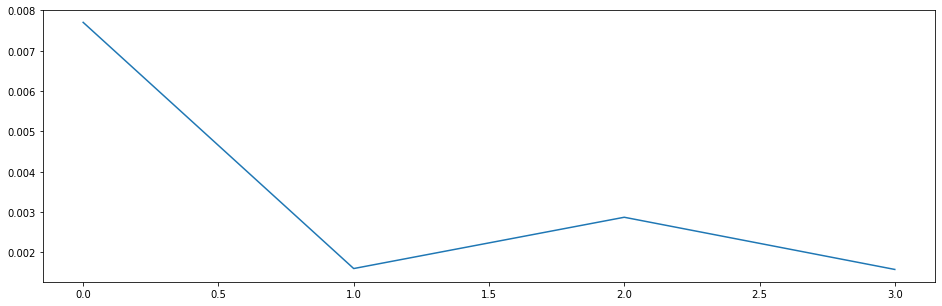

In [41]:
plt.figure(figsize=(16,5))
plt.plot(error_rate)

Best accuracy is achieved by Random Forest regression